# Content based Movie Recommendation

In [32]:
import pandas as pd

In [33]:
movies=pd.read_csv("C:/Users/ASUS/Desktop/top10K-TMDB-movies.csv")

In [34]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [35]:
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [36]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [37]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

# Exploratory Data Analysis

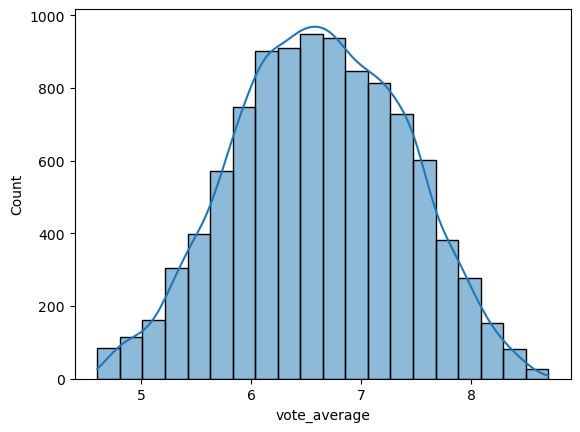

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.show()


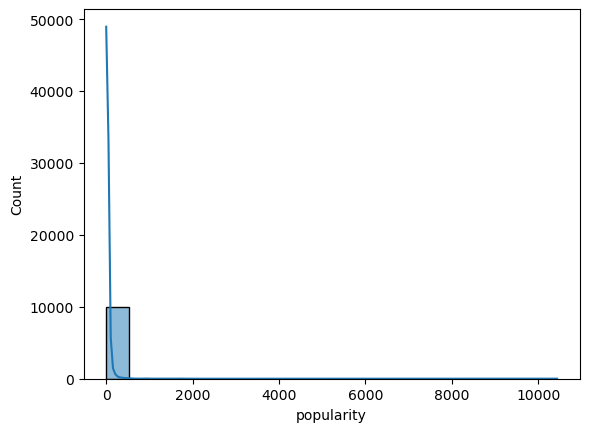

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(movies['popularity'], bins=20, kde=True)
plt.show()


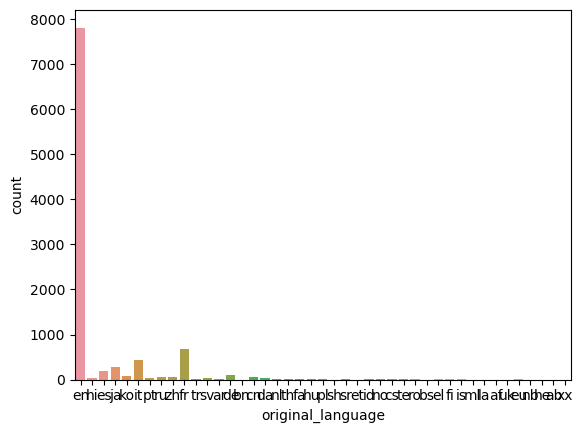

In [47]:
sns.countplot(x='original_language', data=movies)
plt.show()

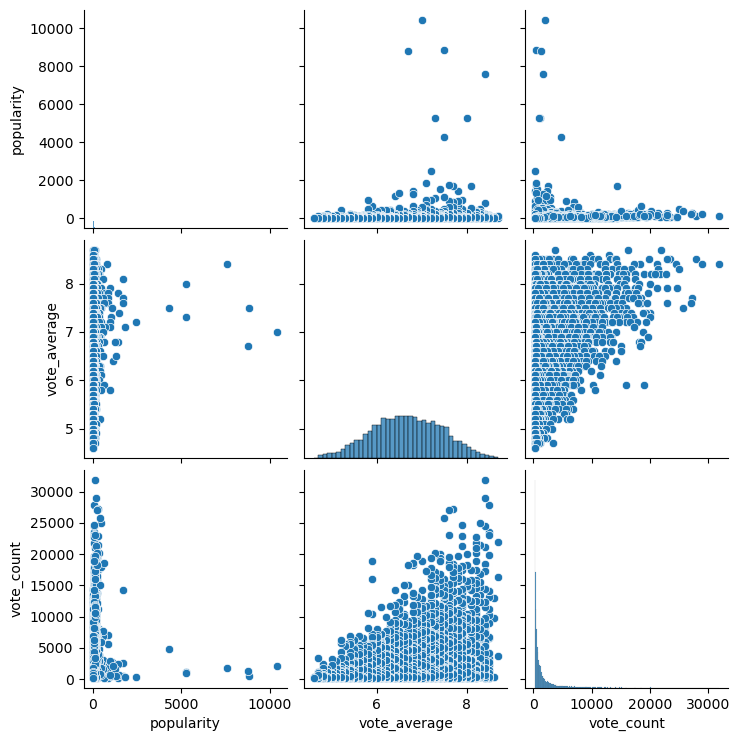

In [48]:
sns.pairplot(movies[['popularity', 'vote_average', 'vote_count']])
plt.show()


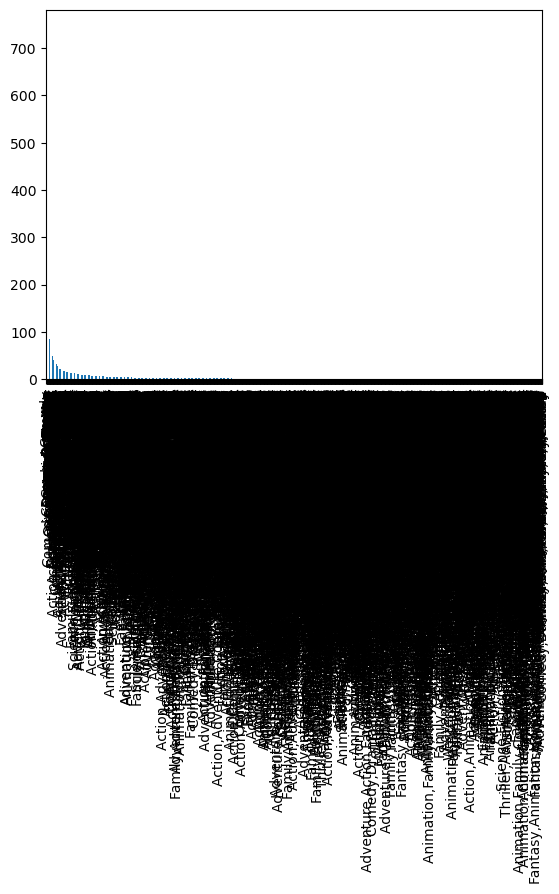

In [49]:
# Assuming genres are separated by '|'
genres = movies['genre'].str.split('|', expand=True).stack().value_counts()
genres.plot(kind='bar')
plt.show()


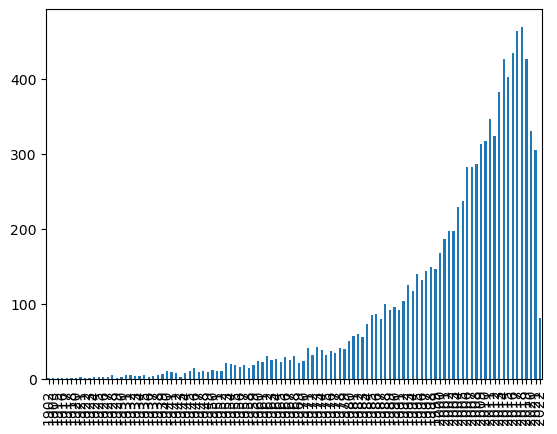

In [50]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year
year_counts = movies['release_year'].value_counts().sort_index()
year_counts.plot(kind='bar')
plt.show()


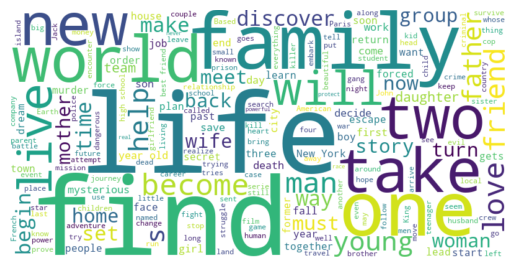

In [53]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(movies['overview'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Feature Engineering

In [8]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
movies=movies[['id','title','genre','overview']]

In [10]:
movies

,id,title,genre,overview
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [11]:
movies['tags']=movies['overview']+movies['genre']

In [12]:
movies

,id,title,genre,overview,tags
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second...","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o...","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo...","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ...","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...,A man named Farmer sets out to rescue his kidn...


In [13]:
new_data=movies.drop(columns=['genre','overview'])

In [14]:
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [15]:
from sklearn.feature_extraction.text import  CountVectorizer

In [16]:
cv=CountVectorizer(max_features=1000, stop_words='english')

In [17]:
cv

CountVectorizer(max_features=1000, stop_words='english')

In [18]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [19]:
vector.shape

(10000, 1000)

# Cosine Similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
similarity=cosine_similarity(vector)

In [22]:
similarity

array([[1.        , 0.10114435, 0.20851441, ..., 0.11616046, 0.16718346,
        0.09325048],
       [0.10114435, 1.        , 0.14552138, ..., 0.        , 0.06482037,
        0.        ],
       [0.20851441, 0.14552138, 1.        , ..., 0.03713907, 0.1069045 ,
        0.13416408],
       ...,
       [0.11616046, 0.        , 0.03713907, ..., 1.        , 0.04962917,
        0.04152274],
       [0.16718346, 0.06482037, 0.1069045 , ..., 0.04962917, 1.        ,
        0.05976143],
       [0.09325048, 0.        , 0.13416408, ..., 0.04152274, 0.05976143,
        1.        ]])

In [23]:
new_data[new_data['title']=="The Godfather"].index[0]

2

In [24]:
distance=sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
House of Gucci
Batman: The Killing Joke
Bomb City


In [25]:
def recommend(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance=sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [26]:
recommend("Iron Man")

Iron Man
Guardians of the Galaxy Vol. 2
Star Wars: Episode III - Revenge of the Sith
G.O.R.A.
Everything Everywhere All at Once


In [27]:
import pickle

In [28]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [29]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [30]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
